# "Concevez une application au service de la santé publique"
_Cleaning Notebook_
13/08 16h

### Importing Modules

In [7]:
## IMPORTATIONS
import pandas as pd
import pandas_profiling
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.0f' % x) 

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

import scipy.stats as st

import re
import time

from google.colab import files
from google.colab import output

import sys
sys.executable # 'C:\\ProgramData\\Anaconda3\\python.exe'

'/usr/bin/python3'

In [8]:
%pprint

Pretty printing has been turned ON


### Defining functions

In [0]:
def sound (choice):
  if choice == 1:
    output.eval_js('new Audio("http://bit.ly/2OyXKjh").play()')
  else:
    output.eval_js('new Audio("http://bit.ly/39bWomp").play()')

In [0]:
def info (df):
    nb_li = df.shape[0]
    nb_co = df.shape[1]
    t = np.empty(nb_li)
    t.fill(nb_li)
    df_l_null = pd.DataFrame(df.T.isna().sum()) # number of null per row
    df_c_null = pd.DataFrame(df.isna().sum()) # number of null per column
    
    # number of rows without any 'null'
    al = len([x for x in df_l_null[0] if x==0])
    nb_ss_null = pd.DataFrame([al]).rename(index={0:'row_wo_null'}).T
    pct_ss_null = pd.DataFrame([al*100/nb_li]).rename(index={0:'row_wo_null'}).T
    # number of rows with all 'null'
    bl = len([x for x in df_l_null[0] if x==nb_co])
    nb_null = pd.DataFrame([bl]).rename(index={0:'row_null'}).T
    pct_null = pd.DataFrame([bl*100/nb_li]).rename(index={0:'row_null'}).T
    # number of mixed rows (with some null)
    cl = len([x for x in df_l_null[0] if (x!=0 and x!=nb_co)])
    nb_mix = pd.DataFrame([cl]).rename(index={0:'row_mix'}).T
    pct_mix = pd.DataFrame([cl*100/nb_li]).rename(index={0:'row_mix'}).T
    info_nb = pd.concat([nb_ss_null, nb_null,
                         nb_mix],axis=1, sort=False).rename(index={0:'nb'})
    info_pct = pd.concat([pct_ss_null, pct_null,
                          pct_mix],axis=1, sort=False).rename(index={0:'pct'})
    info_l = pd.concat([info_nb,info_pct], sort=False)
    # total number of rows
    info_l["row_tot"] = [info_l.T['nb'].sum(), info_l.T['pct'].sum()]
    
    # number of columns without any 'null''
    ac = len([x for x in df_c_null[0] if x==0])
    nb_ss_null = pd.DataFrame([ac]).rename(index={0:'col_wo_null'}).T
    pct_ss_null = pd.DataFrame([ac*100/nb_co]).rename(index={0:'col_wo_null'}).T
    # number of columns with all 'null'
    bc = len([x for x in df_c_null[0] if x==nb_li])
    nb_null = pd.DataFrame([bc]).rename(index={0:'col_null'}).T
    pct_null = pd.DataFrame([bc*100/nb_co]).rename(index={0:'col_null'}).T
    # number of mixed columns (with some null)
    cc = len([x for x in df_c_null[0] if (x!=0 and x!=nb_li)])
    nb_mix = pd.DataFrame([cc]).rename(index={0:'col_mix'}).T
    pct_mix = pd.DataFrame([cc*100/nb_co]).rename(index={0:'col_mix'}).T
    info_nb = pd.concat([nb_ss_null, nb_null,
                         nb_mix],axis=1, sort=False).rename(index={0:'nb'})
    info_pct = pd.concat([pct_ss_null, pct_null, pct_mix],
                         axis=1, sort=False).rename(index={0:'pct'})
    info_c = pd.concat([info_nb,info_pct], sort=False)
    # total number of columns
    info_c["col_tot"] = [info_c.T['nb'].sum(), info_c.T['pct'].sum()]
    
    info = pd.concat([info_l,info_c], axis=1, sort=False)
    
    return info

### Importing dataset

In [0]:
# On Google Colab: Upload a file from Google Drive via PyDrive
# Install PyDrive wrapper & import libraries (once)
!pip install -U -q PyDrive 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create PyDrive client (once)
auth.authenticate_user() 
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Download a file based on its file ID (shareable link)
file_id = '1Ua1RzJPjLAaDg9kgz3SmusmGoUO53OOx'
downloaded = drive.CreateFile({'id': file_id})
sound(2) # notifying successful authentication

In [0]:
downloaded.GetContentFile('en.openfoodfacts.org.products.csv')  
df = pd.read_csv('en.openfoodfacts.org.products.csv',
                 sep='\t', low_memory=False, encoding ='utf-8')

In [15]:
df.head(1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000000010,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1550246813,2019-02-15T16:06:53Z,1550246813,2019-02-15T16:06:53Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,nan,NaN,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN,nan,nan,NaN,nan,nan,NaN,NaN,nan,unknown,unknown,"en:empty, en:to-be-completed, en:nutrition-fac...","en:empty,en:to-be-completed,en:nutrition-facts...","Empty,To be completed,Nutrition facts to be co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


## Data preprocessing

### Description

In [0]:
# Shape of the dataset
dfshape = df.shape # (954463, 175)

In [0]:
 # my_info = info(df)
 # my_info

14 columns with no entry, no row has all the columns filled.

In [0]:
# General description 
desc_df = df.describe(include='all')

In [0]:
# Types and content of the columns
desc_type = pd.DataFrame(df.dtypes, columns=['type']).T

In [0]:
# Null stats per column
nb_null = (dfshape[0]-desc_df.loc["count"].T)
pct_null = (dfshape[0]-desc_df.loc["count"].T)*100/dfshape[0]
desc_null = pd.DataFrame([nb_null, pct_null], index=['nb null','pct null'])

In [20]:
# Concatenate general, type and null stats
my_desc = pd.concat([desc_type, desc_null, desc_df])
my_desc

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
type,object,object,object,int64,object,int64,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,object,object,object,object,object,object,object,object,float64,object,object,object,object,float64,float64,float64,object,object,object,float64,float64,object,float64,float64,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float

In [21]:
# Summary of types and content of the columns
ser_types = df.dtypes
for t in ser_types.unique():
    print(t, ": ", sum(ser_types.values == t))

object :  56
int64 :  2
float64 :  117


### Memory usage reduction

In order to facilitate the manipulation, we can specify the format of each column while loading the data in a pandas dataframe.
The precision of float16 is only 3 digit vs. 15 for float64. 

In [22]:
# Checking the memory usage
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954463 entries, 0 to 954462
Columns: 175 entries, code to carnitine_100g
dtypes: float64(117), int64(2), object(56)
memory usage: 4.6 GB


In [0]:
## Changing format of object and float64 columns
my_dtypes = {}
# object -> category (if nb unique < 10000)
for col in df.columns.values:
    if df[col].dtype == 'object' and  len(df[col].unique()) < 10000 :
        my_dtypes[col] = 'category'
# float64 -> float16
for col in df.columns.values:
    if df[col].dtype == 'float64':
        my_dtypes[col] = 'float16'

In [24]:
# Reload data 
df = pd.read_csv('en.openfoodfacts.org.products.csv', dtype=my_dtypes, 
                 sep='\t', low_memory=False, encoding ='utf-8')  # nrows=1000,
# Recheck memory usage
df.info(memory_usage='deep') # 'deep': enables more accurate memory usage report

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954463 entries, 0 to 954462
Columns: 175 entries, code to carnitine_100g
dtypes: category(23), float16(117), int64(2), object(33)
memory usage: 2.2 GB


Main conclusions : 
- Description :
  954463 rows and 175 columns
  some of them categorical, 
  some of them numerical
- Memory usage reduction : 
  4.6 GB -> 2.2 GB

### Pandas Data Profiling report

In [0]:
dfcopy = df.copy(deep = True)

In [0]:
# Generating a Data Profiling html report via pandas_profiling
# profile = pandas_profiling.ProfileReport(dfcopy) #, check_correlation = False
# profile.to_file("OFFacts_report2_3.html")
# profile

In [0]:
# # extract rejected columns (based on correlation coeff greater than 0.9)
# rejected_variables_90 = profile.get_rejected_variables(threshold=0.9)
# len(rejected_variables_90)

Main conclusions : 

### Filtering out unimportant columns
#### 1. Non relevant columns
Some columns can immediately be classied as non useful for our project and can be dropped : 
- 5 columns concerning to the image of the product: 'image_small_url',	'image_ingredients_url',	'image_ingredients_small_url',	'image_nutrition_url'	'image_nutrition_small_url'
- 3 columns concerning the level of completion of the row: 'states', 'states_tags', 'states_en' 


In [26]:
li_col_del = ['image_small_url',	'image_ingredients_url',
              'image_ingredients_small_url',	'image_nutrition_url',
              'image_nutrition_small_url',
              'states', 'states_tags', 'states_en' ]
# Filtering out 8 non relevant columns
dfcopy.drop(columns=li_col_del, inplace=True)
dfcopy.shape

(954463, 167)

#### 2. Almost empty columns

In [27]:
# Checking all 'null' columns
nbnotnulldf = pd.DataFrame((~dfcopy.isna()).sum(axis =0),
                           columns=['nb'])
nbnotnulldf.sort_values(by=['nb'], axis=0, ascending=True, inplace=True)
nbnotnulldf.T.head(150)

,ingredients_that_may_be_from_palm_oil,cities,allergens_en,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,-lignoceric-acid_100g,no_nutriments,-melissic-acid_100g,ingredients_from_palm_oil,water-hardness_100g,-caproic-acid_100g,-dihomo-gamma-linolenic-acid_100g,-butyric-acid_100g,-stearic-acid_100g,-montanic-acid_100g,-myristic-acid_100g,-behenic-acid_100g,-caprylic-acid_100g,chlorophyl_100g,glycemic-index_100g,-gamma-linolenic-acid_100g,-palmitic-acid_100g,-cerotic-acid_100g,phylloquinone_100g,-arachidic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-maltose_100g,nucleotides_100g,-maltodextrins_100g,carnitine_100g,-arachidonic-acid_100g,-oleic-acid_100g,beta-glucan_100g,additives,choline_100g,serum-proteins_100g,inositol_100g,omega-9-fat_100g,casein_100g,-glucose_100g,chromium_100g,molybdenum_100g,-fructose_100g,beta-carotene_100g,taurine_100g,-eicosapentaenoic-acid_100g,silica_100g,-sucrose_100g,-docosahexaenoic-acid_100g,ph_100g,-linoleic-acid_100g,caffeine_100g,fluoride_100g,bicarbonate_100g,fruits-vegetables-nuts-dried_100g,collagen-meat-protein-ratio_100g,-alpha-linolenic-acid_100g,omega-6-fat_100g,starch_100g,-lactose_100g,carbon-footprint_100g,chloride_100g,biotin_100g,iodine_100g,polyols_100g,energy-from-fat_100g,vitamin-k_100g,selenium_100g,omega-3-fat_100g,manganese_100g,copper_100g,vitamin-e_100g,pantothenic-acid_100g,folates_100g,cocoa_100g,zinc_100g,fruits-vegetables-nuts_100g,vitamin-b9_100g,vitamin-b12_100g,phosphorus_100g,magnesium_100g,vitamin-b6_100g,vitamin-d_100g,carbon-footprint-from-meat-or-fish_100g,fruits-vegetables-nuts-estimate_100g,alcohol_100g,vitamin-b2_100g,ingredients_from_palm_oil_tags,vitamin-b1_100g,vitamin-pp_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,ingredients_that_may_be_from_palm_oil_tags,potassium_100g,first_packaging_code_geo,cities_tags,origins_tags,origins,traces,emb_codes_tags,emb_codes,traces_tags,traces_en,allergens,manufacturing_places_tags,manufacturing_places,generic_name,purchase_places,vitamin-a_100g,vitamin-c_100g,iron_100g,trans-fat_100g,cholesterol_100g,calcium_100g,labels,labels_tags,labels_en,stores,packaging_tags,packaging,additives_tags,additives_en,nutrition-score-fr_100g,nutrition-score-uk_100g,nutrition_grade_fr,serving_size,serving_quantity,quantity,fiber_100g,nova_group,main_category_en,main_category,categories_tags,categories_en,categories,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,ingredients_text,additives_n,brands_tags,brands,image_url,saturated-fat_100g,sodium_100g,salt_100g,sugars_100g,fat_100g,carbohydrates_100g,proteins_100g,energy_100g,product_name,pnns_groups_1,countries,countries_tags,countries_en,pnns_groups_2,creator,created_datetime,last_modified_datetime,last_modified_t,created_t,url,code
nb,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,3,3,3,3,3,3,4,7,9,12,14,15,15,20,20,29,30,34,36,37,38,48,55,58,66,69,84,96,101,117,128,138,197,221,222,254,273,286,287,349,377,392,402,492,528,572,757,948,1016,1315,1486,1850,2286,2341,2969,3079,4389,4497,5724,5971,6196,6666,7667,7776,8240,9069,9439,11549,11737,11941,12255,12571,24227,24281,25787,26011,39971,42868,52543,52629,60264,61952,61978,78169,78169,80681,82155,82186,90676,118066,138881,142425,142479,144226,144975,145497,159491,159515,159515,172337,178136,178139,237485,237485,265819,265819,265819,271817,271932,292258,296733,311177,345085,345085,345154,345154,345156,439597,439597,439597,439597,570120,570167,658401,709820,721199,721218,725435,739163,739214,741437,744167,876610,944390,952425,952425,952425,954115,954460,954462,954463,954463,954463,954463,954463


In [28]:
# Displaying a table with bins
mask = pd.cut(nbnotnulldf['nb'], [-1,0,5,10,100,300,1000000]) # 
mask.value_counts(normalize=False, sort=False)

(-1, 0]            14
(0, 5]             15
(5, 10]             2
(10, 100]          19
(100, 300]         11
(300, 1000000]    106
Name: nb, dtype: int64

In [29]:
# Displaying names of columns with less than 300 entries (0.031%)
mask=pd.cut(nbnotnulldf['nb'], [-1,300])
li_col_del = mask[~mask.values.isna()].index
len(li_col_del), li_col_del

(61,
 Index(['ingredients_that_may_be_from_palm_oil', 'cities', 'allergens_en', '-elaidic-acid_100g', '-gondoic-acid_100g', '-mead-acid_100g', '-erucic-acid_100g', '-nervonic-acid_100g', '-lignoceric-acid_100g', 'no_nutriments', '-melissic-acid_100g', 'ingredients_from_palm_oil', 'water-hardness_100g', '-caproic-acid_100g', '-dihomo-gamma-linolenic-acid_100g', '-butyric-acid_100g', '-stearic-acid_100g', '-montanic-acid_100g', '-myristic-acid_100g', '-behenic-acid_100g', '-caprylic-acid_100g', 'chlorophyl_100g', 'glycemic-index_100g', '-gamma-linolenic-acid_100g', '-palmitic-acid_100g', '-cerotic-acid_100g', 'phylloquinone_100g', '-arachidic-acid_100g', '-capric-acid_100g', '-lauric-acid_100g', '-maltose_100g', 'nucleotides_100g', '-maltodextrins_100g', 'carnitine_100g', '-arachidonic-acid_100g', '-oleic-acid_100g', 'beta-glucan_100g', 'additives', 'choline_100g', 'serum-proteins_100g', 'inositol_100g', 'omega-9-fat_100g', 'casein_100g', '-glucose_100g', 'chromium_100g', 'molybdenum_100

61 columns contain less than 300 entries.
Some of them (11) might nevertheless be used to complete other columns with similar content and require more investigation, or could be used on small specialized subsets of data (mineral waters, energizing drinks, meats...). They should not be dropped at first :
- 'additives',
- 'chromium_100g',
- 'molybdenum_100g',
- 'taurine_100g'
- 'silica_100g',
- 'ph_100g',
- 'caffeine_100g',
- 'fluoride_100g',
- 'bicarbonate_100g',
- 'fruits-vegetables-nuts-dried_100g',
- 'collagen-meat-protein-ratio_100g'

In [30]:
# Removing 11 columns from the "to-be-deleted" columns list 
li_col_not_del =  ['additives', 'chromium_100g', 'molybdenum_100g', 
                   'taurine_100g', 'silica_100g', 'ph_100g', 'caffeine_100g', 
                   'fluoride_100g', 'bicarbonate_100g',
                   'fruits-vegetables-nuts-dried_100g', 
                   'collagen-meat-protein-ratio_100g']
li_col_del = [i for i in li_col_del if i not in li_col_not_del]
# Filtering out 50 columns with less than 300 entries (0.021%)
dfcopy.drop(columns=li_col_del, inplace=True)
dfcopy.shape

(954463, 117)

#### 3. Columns with redundant information

Some of the columns seem to contain similar information. For example : 
  - 'created_t' vs.	'created_datetime'
  - 'last_modified_t	' vs.	'last_modified_datetime			'
  - 'brands		' vs.	'brands_tags'
  - 'categories	' vs.	'categories_tags	'  
  - 'origins' vs.	'origins_tags'
  - 'manufacturing_places' vs.	'manufacturing_places_tags'
  - 'labels' vs.	'labels_tags'  vs.	'labels_en' 
  - 'emb_codes' vs.	'emb_codes_tags'
  - 'countries' vs.	'countries_tags'  vs.	'countries_en'
  - 'traces' vs.	'traces_tags'  vs.	'traces_en' 
  - 'serving_size' vs.	'serving_quantity'
  - 'additives_n' vs. 'additives' vs.	'additives_tags'  vs.	'additives_en'
  - 'ingredients_from_palm_oil_n' vs.	'ingredients_from_palm_oil_tags'
  - 'ingredients_that_may_be_from_palm_oil_n' vs.	'ingredients_that_may_be_from_palm_oil_tags'
  - 'pnns_groups_1' vs. 'pnns_groups_2'
  - 'main_category' vs. 'main_category_en'
  - 'fruits-vegetables-nuts_100g' vs. 'fruits-vegetables-nuts-dried_100g' vs. 'fruits-vegetables-nuts-estimate_100g'
  

Let's see if some of them can be dropped or their content gathered in only one column.
To that end, we define a function that :
- compares the content of two columns col1 and col2 of the dataframe
- prints the number or rows with 1) both columns, 2) col1 only, 3) col2 only, and 4) none of them filled
- returns indexes of 1) data in both columns, 2) data only in col1, 3) data only in col2, and 4) no data at all.

In [0]:
# Compares content of 2 columns, print info and returns indexes 
def comp_df (df, col1, col2):
  mboth = (~df[[col1,col2]].isna()).sum(axis=1)==2 # mask for both cells filled
  mone = (~df[[col1,col2]].isna()).sum(axis=1)==1 # mask for only one cell filled
  mcol1 = mone & ~df[col1].isna() # mask for only col1 cell filled
  mcol2 = mone & ~df[col2].isna() # mask for only col2 cell filled
  mnone = ~mone & ~mboth
  ind_both = df.index[mboth].to_list()
  ind_col1 = df.index[mcol1].to_list()
  ind_col2 = df.index[mcol2].to_list()
  ind_none = df.index[mnone].to_list()
  #ind_none = df.index[mnone].tolist()
  print("nb rows both filled: ", len(ind_both))
  print("nb rows with only", col1, "filled: ", len(ind_col1))
  print("nb rows with only", col2, "filled: ", len(ind_col2))
  print("nb rows not filled: ", len(ind_none))
  return(ind_both, ind_col1, ind_col2, ind_none)

In [0]:
li_col_del = []

In [89]:
# 'created_t' vs. 'created_datetime'
c1 = 'created_t'
c2 = 'created_datetime'
t_ind = comp_df(dfcopy, c1, c2)
dfcopy.loc[t_ind[1],[c1, c2]].head(2)


nb rows both filled:  954462
nb rows with only created_t filled:  1
nb rows with only created_datetime filled:  0
nb rows not filled:  0


,created_t,created_datetime
333514,0,NaN


In [90]:
# 'last_modified_t' vs. 'last_modified_datetime'
c1 = 'last_modified_t'
c2 = 'last_modified_datetime'
t_ind = comp_df(dfcopy, c1, c2)
dfcopy.loc[t_ind[1],[c1, c2]].head(2)

nb rows both filled:  954463
nb rows with only last_modified_t filled:  0
nb rows with only last_modified_datetime filled:  0
nb rows not filled:  0


,last_modified_t,last_modified_datetime


Columns 'created_datetime' and 'last_modified_datetime' have data in a more usable format.

We drop 'created_t' and 'last_modified_t'.

In [0]:
# adding to the list of columns to drop
li_col_del.append(['created_t', 'last_modified_t'])

In [141]:
#'brands' vs. 'brands_tags'
c1 = 'brands'
c2 = 'brands_tags'
t_ind = comp_df(dfcopy, c1, c2)
dfcopy.loc[t_ind[1],[c1, c2]].head(2)
dfcopy.loc[ind12,[c1, c2]]

nb rows both filled:  570112
nb rows with only brands filled:  0
nb rows with only brands_tags filled:  0
nb rows not filled:  384351


,brands,brands_tags


The rows with only one column filled are invalid values.

Let's create a function that sets both entries to NaN if at least one of them is NaN:

In [0]:
def set_None_if_one_None (df, ind, c1, c2):
  for i in ind:
    if df.loc[i,c1].isnull() or df.loc[i,c2].isnull():
      df.loc[i,[c1,c2]] = None

If 'brands' or 'brand_tags' is NaN we set the other to NaN as well.  

In [0]:
set_NaN_if_one_NaN(dfcopy,t_ind[1]+t_ind[2],c1,c2)

In [148]:
# Displaying cells when both columns are filled
dfcopy.loc[t_ind[0], [c1,c2]].head(2)


,origins,origins_tags
290,France,france
293,Québec,quebec


Both columns seem to contain the same information except 'brands' has caps, french accents, and spaces. Also, in 'brands_tags' spaces has been replaced by dashes.

We decide to keep the column 'brands' to be more accurate, and delete 'brands_tags'.

In [0]:
# Adding to the list of columns to drop
li_col_del.append('brands_tags')

In [149]:
#'categories' vs. 'categories_tags'
c1 = 'categories'
c2 = 'categories_tags'
t_ind = comp_df(dfcopy, c1, c2)
dfcopy.loc[t_ind[1],[c1, c2]].head(2)

nb rows both filled:  345154
nb rows with only categories filled:  0
nb rows with only categories_tags filled:  0
nb rows not filled:  609309


,categories,categories_tags


In [150]:
# Displaying cells when both columns are filled
dfcopy.loc[t_ind[0], [c1,c2]].head(2)

,categories,categories_tags
4,fr:Xsf,fr:xsf
10,"Plats préparés, Légumes préparés, Carottes râp...","en:meals,en:prepared-vegetables,en:grated-carr..."


The columns 'categories' is in french and 'categories_tags' in english. Both columns are useful. We keep both of them after replacing '??' values in 'categories' by NaN:

In [0]:
# Setting invalid values to NaN
set_NaN_if_one_NaN(dfcopy,t_ind[1]+t_ind[2],c1,c2)

In [151]:
#'origins' vs. 'origins_tags'
c1 = 'origins'
c2 = 'origins_tags'
t_ind = comp_df(dfcopy, c1, c2)
dfcopy.loc[t_ind[1]+t_ind[2],[c1, c2]].head(2)

nb rows both filled:  52541
nb rows with only origins filled:  0
nb rows with only origins_tags filled:  0
nb rows not filled:  901922


,origins,origins_tags


The rows with only one column filled are NaN values. We set all 'origins' and 'origins_tags' with one NaN value to NaN.

In [0]:
# Setting invalid value to NaN
set_NaN_if_one_NaN(dfcopy,t_ind[1]+t_ind[2],c1,c2)

In [162]:
# Displaying cells when both columns are filled
dfcopy.loc[t_ind[0][50:56], [c1,c2]]

,origins,origins_tags
2131,tibet,tibet
2135,"Espagne,Royaume-Uni","espagne,royaume-uni"
2162,United States,united-states
2186,Estados Unidos,estados-unidos
2511,Royaume-Uni,royaume-uni
2657,Grande Bretagne,grande-bretagne


The columns 'origins' and 'origins_tags' are the same except 'origins_tags' has no space (replaced by a dash) and no caps. We keep 'origins' and drop 'origins_tags'.

In [0]:
# Adding to the list of columns to drop
li_col_del.append('origins_tags')

In [0]:
#'manufacturing_places' vs. 'manufacturing_places_tags'

In [166]:
c1 = 'manufacturing_places'
c2 = 'manufacturing_places_tags'
t_ind = comp_df(dfcopy, c1, c2)
dfcopy.loc[t_ind[1]+t_ind[2],[c1, c2]].head(2)

nb rows both filled:  82155
nb rows with only manufacturing_places filled:  31
nb rows with only manufacturing_places_tags filled:  0
nb rows not filled:  872277


,manufacturing_places,manufacturing_places_tags
226729,?,NaN
234777,?,NaN


In [0]:
# Setting invalid values to None
dfcopy.loc[t_ind[1]+t_ind[2], [c1,c2]] = None

In [173]:
# Displaying cells when both columns are filled
dfcopy.loc[t_ind[0][50:56], [c1,c2]]

,manufacturing_places,manufacturing_places_tags
1327,87500 Saint Yrieix,87500-saint-yrieix
1329,"France,87500","france,87500"
1334,Royaume-Uni,royaume-uni
1346,"Écosse,Royaume-Uni","ecosse,royaume-uni"
1356,Black Sheep Brewery,black-sheep-brewery
1363,ESTADOS UNIDOS AMERICANOS,estados-unidos-americanos


The columns 'manufacturing_places' and 'manufacturing_places_tags' are the same except 'origins_tags' has no space (replaced by a dash) and no caps. We keep 'manufacturing_places' and drop 'manufacturing_places_tags'.

In [0]:
# Adding to the list of columns to drop
li_col_del.append('manufacturing_places_tags')

In [193]:
#'labels' vs. 'labels_tags'
c1 = 'labels'
c2 = 'labels_tags'
t_ind = comp_df(dfcopy, c1, c2)
dfcopy.loc[(t_ind[1]+t_ind[2])[10:15],[c1, c2]]

nb rows both filled:  159479
nb rows with only labels filled:  12
nb rows with only labels_tags filled:  36
nb rows not filled:  794936


,labels,labels_tags
747822,/,NaN
930248,?,NaN
141575,NaN,"en:carbon-footprint,en:carbon-footprint,en:car..."
141582,NaN,"en:carbon-footprint,en:carbon-footprint,en:car..."
149953,NaN,"en:carbon-footprint,en:carbon-footprint,en:car..."


In [187]:
# Displaying cells when both columns are filled
dfcopy.loc[t_ind[0][110:116], [c1,c2]]

,labels,labels_tags
347,"Bio, Bio européen, FR-BIO-10, AB Agriculture B...","en:organic,en:eu-organic,en:fr-bio-10,fr:ab-ag..."
350,"Kascher, Contient des OGMs","en:kosher,en:contains-gmos"
354,Point Vert,en:green-dot
357,Contient des OGMs,en:contains-gmos
360,Point Vert,en:green-dot
361,"Contient des OGMs, Sans arômes artificiels","en:no-artificial-flavors,en:contains-gmos"


The columns 'labels' and 'labels_tags' are the same except 'labels_tags' has no space (replaced by a dash) and no caps. We keep 'labels' and drop 'labels_tags'.

We also drop 'labels' entries when 'labels_tags' is NaN, and change NaN in 'labels' with "Empreinte Carbone" (corresponding to "carbon-footprint" in 'labels_tags').

In [0]:
# Setting invalid values of c1 to NaN
dfcopy.loc[t_ind[1], [c1]] = np.nan
# Setting NaN values of c1 to "Empreinte carbone"
dfcopy.loc[t_ind[2], [c1]] = 'Empreinte carbone'

In [206]:
#'labels' vs. 'labels_en'
c1 = 'labels'
c2 = 'labels_en'
t_ind = comp_df(dfcopy, c1, c2)
dfcopy.loc[(t_ind[1]+t_ind[2])[10:15],[c1, c2]]

nb rows both filled:  159515
nb rows with only labels filled:  0
nb rows with only labels_en filled:  0
nb rows not filled:  794948


,labels,labels_en


In [208]:
# Displaying cells when both columns are filled
dfcopy.loc[t_ind[0], [c1,c2]].head(2)

,labels,labels_en
83,"Bio, Bio européen, Agriculture UE/Non UE, FR-B...","Organic,EU Organic,EU/non-EU Agriculture,FR-BI..."
91,Organic,Organic


The column 'labels' is in french and 'labels_en' in english. Both columns are useful. We keep both of them.

In [0]:
#'emb_codes' vs. 'emb_codes_tags'

In [0]:
#'countries' vs. 'countries_tags' vs. 'countries_en'

In [0]:
#'traces' vs. 'traces_tags' vs. 'traces_en'

In [0]:
#'serving_size' vs. 'serving_quantity'

In [0]:
#'additives_n' vs. 'additives' vs. 'additives_tags' vs. 'additives_en'

In [0]:
#'ingredients_from_palm_oil_n' vs. 'ingredients_from_palm_oil_tags'

In [0]:
#'ingredients_that_may_be_from_palm_oil_n' vs. 'ingredients_that_may_be_from_palm_oil_tags'

In [0]:
#'pnns_groups_1' vs. 'pnns_groups_2'

In [0]:
#'main_category' vs. 'main_category_en'

In [0]:
#'fruits-vegetables-nuts_100g' vs. 'fruits-vegetables-nuts-dried_100g' vs. 'fruits-vegetables-nuts-estimate_100g'

In [137]:
# gives the list of rows with both columns filled
col1 = 'additives'
col2 = 'additives_en'

# list of values with both columns filled
print("both columns filled: ",df[[col1, col2]].loc[ind_both])
print("one of them filled: ", len(ind_one))
print("col1 filled: ", (~df[[col1]].isna()).sum().values)
print("col2 filled: ", (~df[[col2]].isna()).sum().values)

11 237492
both columns filled:                                                  additives                                       additives_en
71600    [ strawberry-juice -> en:strawberry-juice  ] ...   E330 - Citric acid,E440 - Pectins,E440i - Pectin
81804    [ puree-de-raisins-biologique -> fr:puree-de-...                      E440 - Pectins,E440i - Pectin
146968   [ oucheri-andre-du-prc-tomme-chevre-pyrenee-3...  E150c - Ammonia caramel,E153 - Vegetable carbo...
274170   [ 37-apfel -> de:37-apfel  ]  [ susse-brombee...                                 E330 - Citric acid
442163   [ viande-de-porc -> fr:viande-de-porc  ]  [ v...  E170 - Calcium carbonate,E252 - Potassium nitr...
468743   [ champignons-de-paris-eau -> fr:champignons-...            E300 - Ascorbic acid,E330 - Citric acid
470182   [ crevettes-98 -> fr:crevettes-98  ]  [ creve...                             E331 - Sodium citrates
494637   [ ingredients-genoise -> fr:ingredients-genoi...  E150a - Plain caramel,E336 - Potassiu

Eventually, the column 'additives' does not really contain usable data. We will nevertheless drop it.

#### 4. Columns which content could be verified or reconstructed

Some columns are related and provide information useful to retrieve data via feature engineering.
To help the automatization of these tasks, we categorize the columns as follows :

**cat_fat**: 'saturated_fat_100g', 'monounsaturated_fat_100g', 'polyunsaturated_fat_100g', 'trans-fat_100g', 'cholesterol_100g'

**cat_poly_fat**: 'omega-3-fat_100g', 'omega-6-fat_100g'

**cat_carb**: 'sugars_100g', 'starch_100g', 'polyols_100g', 'fibers_100g', '-lactose_100g'

**cat_comp**: cat_fat, cat_carb, 'proteins_100g'

**cat_vit-oligo**:  'vitamin-a_100g',	'vitamin-d_100g',	'vitamin-e_100g',	'vitamin-k_100g',	'vitamin-c_100g',	'vitamin-b1_100g',	'vitamin-b2_100g',	'vitamin-pp_100g',	'vitamin-b6_100g',	'vitamin-b9_100g',	'folates_100g',	'vitamin-b12_100g',	'biotin_100g',	'pantothenic-acid_100g',	'bicarbonate_100g',	'potassium_100g',	'chloride_100g',	'calcium_100g',	'phosphorus_100g',	'iron_100g',	'magnesium_100g',	'zinc_100g',	'copper_100g',	'manganese_100g',	'fluoride_100g',	'selenium_100g',	'iodine_100g',	'caffeine_100g', 'cocoa_100g'

We will then proceed to : 

Deductions
- 'fat_100g' **-> **'energy_from_fat_100g'**
- sum of values from **cat_comp** -> **'energy_100g'**

Comparisons
- sum of values from **cat_fat** < **'fat_100g'**
- sum of values from **cat_poly_fat** < **'polyunsaturated_fat_100g'**
- sum of values from **cat_carb** < **'carbohydrates_100g'**
- sum of values from **cat_vit-oligo** < XXXXg (A VOIR)
- sum of values from **cat_comp** < 100g
- 'salt_100g' x 0.3934 < 'sodium_100g' *

and eventually correct or delete the erroneous data.

\* molar masses :
NaCl: 58.44 g/mol - Na: 22.99g/mol - Cl: 35.45g/mol, therefore the part of sodium in the weight of salt is 22.99/58.44=39.34% (NB: there might be other extra sources of sodium than salt in a product).



In [0]:
# Making list of columns with similar or complementary content
categ = {
    'code': "cat_key",
    'url': "cat_key",
    'creator': "cat_key",
    'created_t',
    'created_datetime',
    'last_modified_t',
    'last_modified_datetime',
    'product_name',
    'generic_name',
    'quantity',
    'packaging',
    'packaging_tags', 
   'pnns_groups_1': "cat_nutri_inf" ,
    'pnns_groups_2': "cat_nutri_inf",
    'pnns_groups_2': "cat_nutri_inf",
    'pnns_groups_2': "cat_nutri_inf",
    'pnns_groups_2': "cat_nutri_inf",
}
categ

{'pnns_groups_1': 'cat_nutri_inf', 'pnns_groups_2': 'cat_nutri_inf'}

In [171]:
my_df=dfcopy.iloc[ind_both]

178134 7
both columns filled:                    packaging       packaging_tags
17      barquette,plastique  barquette,plastique
135         bocal,plastique      bocal,plastique
138               plastique            plastique
290        carton,plastique     carton,plastique
291        plastique,carton     plastique,carton
...                     ...                  ...
954409     carton,plastique     carton,plastique
954423            plastique            plastique
954429       műanyag,zacskó       műanyag,zacsko
954434            bouteille            bouteille
954438            Plastique            plastique

[178134 rows x 2 columns]
one of them filled:  7
col1 filled:  [178139]
col2 filled:  [178136]


In [139]:
#Filtering out columns with redundant data
dfcopy.drop(columns=['created_t', 'last_modified_t'])
dfcopy.dropna(subset=[how='any','created_t', 'last_modified_t'],inplace=True)



AttributeError: ignored

In [0]:
# Displaying columns names
dfcopy.columns.to_list()

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'allergens', 'traces', 'traces_tags', 'traces_en', 'serving_size', 'serving_quantity', 'additives_n', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr', 'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en', 'main_category', 'main_category_en', 'image_url', 'image_sm

In [0]:
# # Number of 'null' rows and columns in the dataset
# info_df = info(df)
# pd.options.display.float_format = '{:.0f}'.format
# info_df.head()

In [0]:
dfcopy.additives

In [0]:
# gives the list of rows with both columns filled
col1 = 'pnns_groups_1'
col2 = 'pnns_groups_2'
sermaskboth = (~dfcopy[[col1,col2]].isna()).sum(axis=1)==2 # série-masque 2 entrées non nulles
sermaskone = (~dfcopy[[col1,col2]].isna()).sum(axis=1)==1 # série-masque 1 entrée non nulles
ind_both = dfcopy.index[sermaskboth].tolist()
ind_one = dfcopy.index[sermaskone].tolist()
# number of rows with both values, and only one value filled
print(len(ind_both), len(ind_one))
# list of values with both columns filled
dfcopy[[col1, col2]].loc[ind_both]

944390 9725


,pnns_groups_1,pnns_groups_2
0,unknown,unknown
1,unknown,unknown
2,unknown,unknown
3,unknown,unknown
4,unknown,unknown
...,...,...
954458,unknown,unknown
954459,unknown,unknown
954460,unknown,unknown
954461,Fish Meat Eggs,Meat


Main conclusions : 

### Missing values
#### Vizualisation

dqsxdsqx


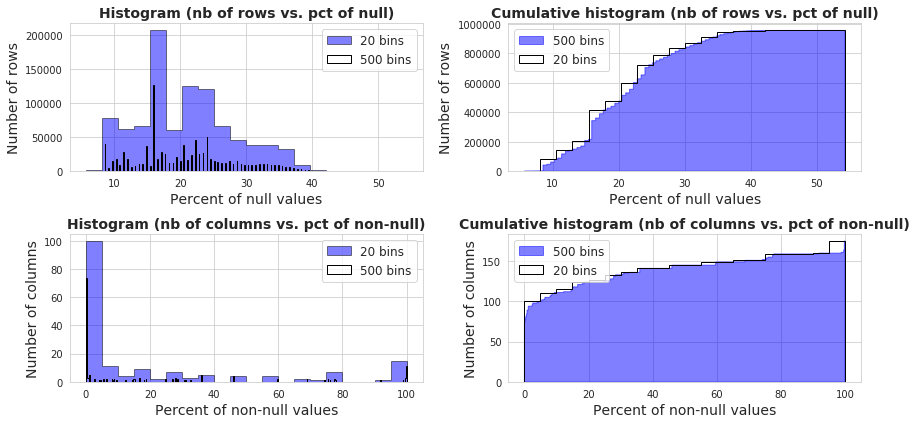

In [0]:
# # Vizualisation of missing values
# # columns vs. xx % null/non-null values

nb_col_non_null = desc_df.loc["count"].values.astype(int) # nb of null for each col
pct_col_non_null = nb_col_non_null*100/df.shape[0] # pct of null for each col

nb_row_non_null = df.count(axis=1).values.astype(int) # nb of null for each row
pct_row_non_null = nb_row_non_null*100/df.shape[1] # pct of null for each row

fig1 = plt.figure(figsize = (13,6))

ax1 = plt.subplot(2,2,1)
ax1.hist(pct_row_non_null, bins=20, density=False, alpha =0.5,
         histtype='stepfilled', cumulative=False,
         fc='blue', ec='k', label='20 bins')
ax1.hist(pct_row_non_null, bins=500, density=False,
         histtype='step', cumulative=False,
         fc='blue', ec='k', label='500 bins')
plt.xlabel("Percent of null values", fontsize=14)
plt.ylabel("Number of rows", fontsize=14)
#plt.xlim(40, 160), plt.ylim(0, 0.03)
#plt.text(0,my_y_lim*0.05, "blabla", fontsize=14)
plt.title("Histogram (nb of rows vs. pct of null)", 
          fontsize=14, fontweight='bold')
plt.grid(True), plt.legend(loc='upper right', fontsize=12)

ax2 = plt.subplot(2,2,2)
ax2.hist(pct_row_non_null, bins=500, fc='b', alpha =0.5, ec='b', 
         density=False, histtype='stepfilled', cumulative=True,
         label='500 bins')
ax2.hist(pct_row_non_null, bins = 20, fc = 'None', ec = 'k', 
         density=False, histtype='step', cumulative=True, 
         label='20 bins')
plt.xlabel("Percent of null values", fontsize=14)
plt.ylabel("Number of rows", fontsize=14)
#plt.xlim(40, 160), plt.ylim(0, 0.03)
#plt.text(0,my_y_lim*0.05, "blabla", fontsize=14)
plt.title("Cumulative histogram (nb of rows vs. pct of null)",
          fontsize=14, fontweight='bold')
plt.grid(True), plt.legend(loc='upper left',fontsize=12)

# # Vizualisation of existing values
# # columns with xx % non-null value

nb_non_null = desc_df_all.loc["count"].values.astype(int) # nb of null for each col
pct_non_null = nb_non_null*100/df.shape[0] # pct of null for each col

ax1 = plt.subplot(2,2,3)
ax1.hist(pct_col_non_null, bins=20, density=False, alpha =0.5,
         histtype='stepfilled', cumulative=False,
         fc='blue', ec='k', label='20 bins')
ax1.hist(pct_col_non_null, bins=500, density=False,
         histtype='step', cumulative=False,
         fc='blue', ec='k', label='500 bins')
plt.xlabel("Percent of non-null values", fontsize=14)
plt.ylabel("Number of columns", fontsize=14)
#plt.xlim(40, 160), plt.ylim(0, 0.03)
#plt.text(0,my_y_lim*0.05, "blabla", fontsize=14)
plt.title("Histogram (nb of columns vs. pct of non-null)", 
          fontsize=14, fontweight='bold')
plt.grid(True), plt.legend(fontsize=12)

ax2 = plt.subplot(2,2,4)
ax2.hist(pct_col_non_null, bins=500, fc='b', alpha =0.5, ec='b', 
         density=False, histtype='stepfilled', cumulative=True,
         label='500 bins')
ax2.hist(pct_col_non_null, bins = 20, fc = 'None', ec = 'k', 
         density=False, histtype='step', cumulative=True, 
         label='20 bins')
plt.xlabel("Percent of non-null values", fontsize=14)
plt.ylabel("Number of columns", fontsize=14)
#plt.xlim(40, 160), plt.ylim(0, 0.03)
#plt.text(0,my_y_lim*0.05, "blabla", fontsize=14)
plt.title("Cumulative histogram (nb of columns vs. pct of non-null)",
          fontsize=14, fontweight='bold')
plt.grid(True), plt.legend(loc='upper left',fontsize=12)
fig1.tight_layout()

plt.show()

In [0]:
# # Producing table with number and pct of missing/non-missing values for each column
# df_null = desc_df_all.loc[['null','count']].T.sort_values(by = 'count')
# df_null["pct_null"] = df_null["null"]*100/df.shape[0]
# df_null["pct_non_null"] = df_null["count"]*100/df.shape[0]
# #df_null["total"] = df_null["count"]+df_null["null"]
# df_null = df_null.sort_values(by = 'count')
# pd.options.display.float_format = '{:.2f}'.format
# df_null.head(7)

### Cleaning of key columns

### Dealing with duplicates
Step by step :
- _absolute duplicates_ : keep the first
- _duplicates among key columns ('code')_ :
keep the row with less missing values, and if there're the same, keep the row with most distinct values

(One Function including all the steps "dealing_duplicates")

In [0]:
df_clean = df.copy(deep = True)

In [0]:
# Check nb of duplicated rows

def check_duplicates(df, key_cols) : 
  dup_key_df = df_clean[df_clean.duplicated(subset=key_cols,
                                            keep=False).values]
  dup_key_df = dup_key_df.fillna('missing').loc[:,key_cols]\
                         .reset_index().groupby(by=key_cols).count()
  # NB : necessary to use fillna because groupby doesn't consider nan as a value
  return  dup_key_df.shape[0], dup_key_df.sum().values[0]

In [0]:
key_cols = ['code','product_name','quantity','brands']
#key_cols = list(df.columns)
dup_t = check_duplicates(df, key_cols)
print("nb of groups of duplicates : ", dup_t)

(117, 234)

In [0]:
def dealing_duplicates (df, key_cols):

  df_clean = df.copy(deep = True)

  # Delete 'null' rows, if existing
  df_clean.dropna(how = 'all', axis = 0, inplace = True)

  # Delete duplicated rows (all columns)
  dup_all_ser = df_clean.duplicated(subset=None, keep='first')
  df_clean.drop(index = df_clean[dup_all_ser.values == True].index, inplace=True)

  # Dealing with duplicated rows (among key columns)
  dup_key_df = df_clean[df_clean.duplicated(subset=key_cols,
                                            keep=False).values]

  # ranging indexes by decreasing amount of 'nan's then by distinct values
  li_ind = pd.DataFrame({'n_rens' : df.isna().T.sum().values,
                'n_dist' : len(df.iloc[1].T.unique())},
                              index = ech.index.values)\
          .sort_values(by=["n_rens", "n_dist"], ascending = True).index
  df_comb = df.loc[li_ind[0]:li_ind[0]]
  # combine the rows in appropriate order
  for ind in li_ind:
      df_comb = df_comb.reset_index().combine_first(df.loc[ind:ind]\
                       .reset_index()).set_index('index').rename_axis(None)
  # replaces the unique row and drop useless rows
  df_clean.update(df_comb, overwrite=True)
  df_clean.drop(li_ind[1:], inplace = True)

  return df_clean


In [0]:
df_cleanbis = dealing_duplicates (df, ['code'])

In [0]:
df_cleanbis.shape

(954302, 175)

In [0]:
# 2 éliminer les entrées qui n'ont pas de code, ou pas de nom de produit

In [0]:
#np.nansum(dup_key_df.groupby(by=['code','product_name','quantity','brands']).count()["url"].values)

In [0]:
# New column 'quantity_norm' with normalized quantities (put all in g, numeric)
#df_clean["quantity"]
#df.replace(to_replace=r'g', value='', regex=True)

In [0]:
#dup_key_df.groupby(by=['code','product_name','quantity','brands']).count().shape#

In [0]:
# dup_code_ser = df.duplicated(subset=['code'], keep='first')
# dup_name_ser = df.duplicated(subset=['product_name'], keep='first')
# dup_code_name_ser = df.duplicated(subset=['code','product_name'], keep='first')
# dup_name_quant_ser = df.duplicated(subset=['quantity','product_name'], keep='first')

In [0]:
# Rows with erroneous barcode
# number of digits
# code_len_tab = df["code"].apply(len).values
# nb_dig_code_df = pd.DataFrame(np.histogram(code_len_tab, bins = max(code_len_tab)))
# nb_dig_code_df.

# key control

In [0]:
# # Calculating the EAN check digit for 13-digit numbers
# def calc_check_digit(number):
#     first = 
#     last = 
#     if len(number) not in (14, 13, 12, 8):
#         return False
#     else:
#         return str((10 - sum((3, 1)[i % 2] * int(n)
#                          for i, n in enumerate(reversed(number)))) % 10)
        
# def validate(number):
#     """Check if the number provided is a valid EAN-13. This checks the length
#     and the check bit but does not check whether a known GS1 Prefix and
#     company identifier are referenced."""
#     number = compact(number)
#     if not isdigits(number):
#         raise InvalidFormat()
#     if len(number) not in (14, 13, 12, 8):
#         raise InvalidLength()
#     if calc_check_digit(number[:-1]) != number[-1]:
#         raise InvalidChecksum()
#     return number

### Reconstructing/fixing the columns

In [0]:
# Checking the number and extracting names of 'null' columns, if existing
# col_dropna_df = df.dropna(how = 'all', axis = 1, inplace = False)
# cols_null = [col for col in df.columns if col not in col_dropna_df.columns]
# len(cols_null), cols_null

In [0]:
# Number of duplicates considering all columns or selection of crucial columns
# dup_all_ser.sum(), dup_code_ser.sum(), dup_name_ser.sum(),\
# dup_code_name_ser.sum(), dup_name_quant_ser.sum()

In [0]:
# Rows with erroneous name ('' or numbers)


In [0]:
# Checking number and extracting names of columns with more than 2.5% missing values ('null')
# cols_miss_val = df_null[df_null['pct_non_null']<2.5].index
# len(cols_miss_val), cols_miss_val

In [0]:
# Diff(rejected_variables_90,cols_miss_val)

__Main conclusions__ :
 - 14 columns with no data
 - 78 columns with very few data (less than 2.5 %)
 - 0 row with no data
 -  rows with crucial data missing

#### Dealing with missing values

In [0]:
# Eliminating rows with crucial data missing
# (no null row to eliminate)
# df_clean = df_clean.drop(columns = col_miss_val)
# df_clean.shape

In [0]:
# Eliminating columns with more than 2.5% missing values
# (no null row to eliminate)
# df_clean = df_clean.drop(columns = col_miss_val)
# df_clean.shape

### Outliers

#### -> dealing with outliers

### Rescaling data

In [0]:
# separating numerical data from object data
# num_df = df.select_dtypes(include="number")
# obj_df = df.select_dtypes(include="object")
# df.shape, num_df.shape, obj_df.shape

In [0]:
# # no need for the datetime columns
# # cols = [c for c in df.columns if c.lower()[-9:] != '_datetime' and c.lower()[-2:] != '_t']
# cols = [c for c in df.columns if c.lower()[-5:] == '_100g']
# cols.append('code')
# df = df[cols]

# # eliminate null values
# df = df[(df['energy_100g'] != 0) & (df['nutrition-score-fr_100g'] != 0)]

# # we keep only column 70% filled
# thresh = len(df) * .3
# df.dropna(thresh = thresh, axis = 1, inplace = True)

# df = df.fillna(0)

# df = df.round(5)